In [1]:
# Imports
import music21
from music21.pitch import Pitch
from music21.note import Note

import sys
sys.path.append('../')
from delasol solmize
from delasol.gamut_graph import SoftContinentalGamut
from delasol.utils import as_stream

## Issue 1: many paths of identical cost

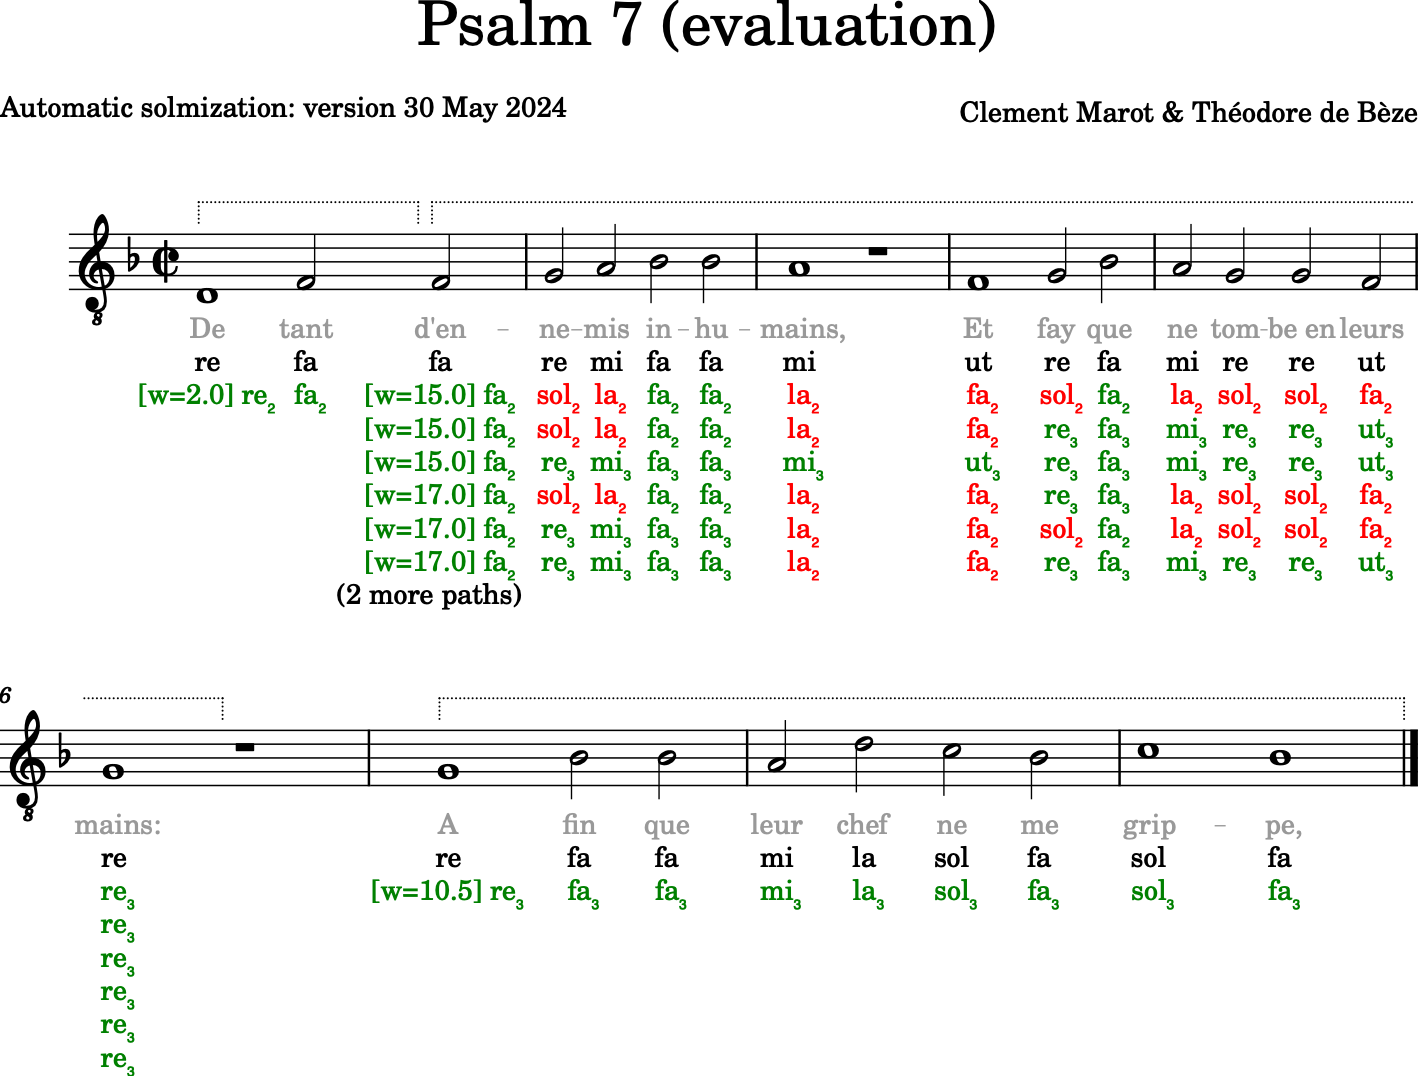

In [11]:
score = music21.converter.parse('../tests/scores/issue-01.mxl')
solmization = solmize(score, gamut='soft-continental', fa_super_la_weight=1)
solmization.annotate(
    target_lyrics=2, 
    lyric_offset=3,
    grey_lyrics_num=1
)
score.show()

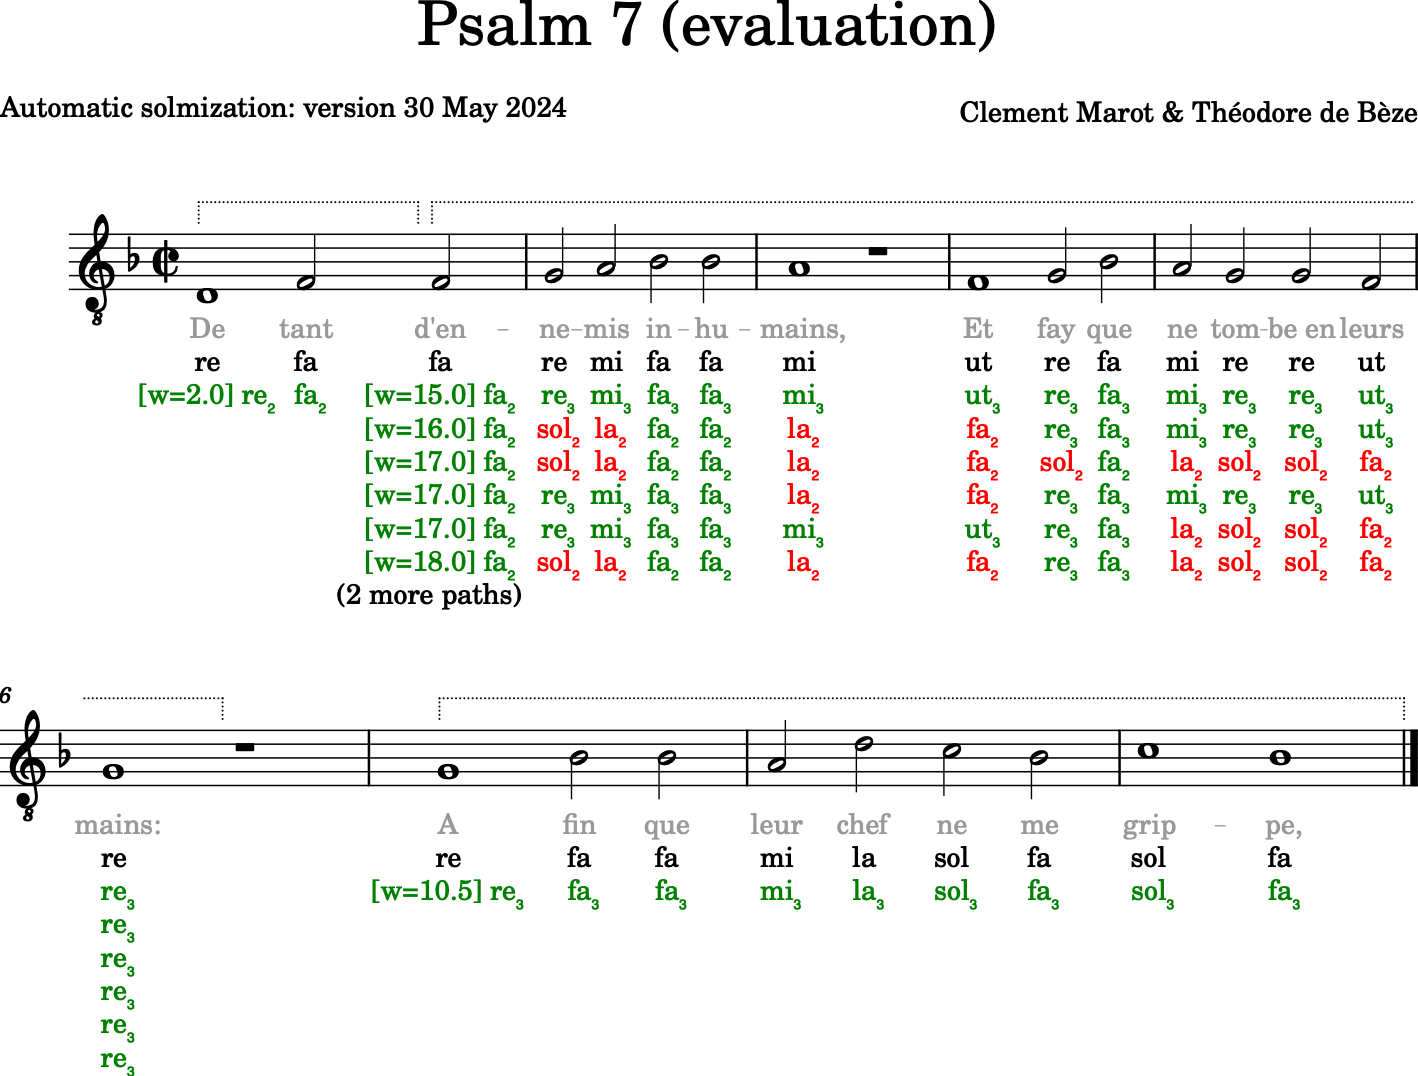

In [12]:
# Seems remedied by larger fa_super_la_weight
score = music21.converter.parse('../tests/scores/issue-01.mxl')
solmization = solmize(score, gamut='soft-continental', fa_super_la_weight=1.5)
solmization.annotate(target_lyrics=2, grey_lyrics_num=1)
score.show()

The many paths here are caused by the jumps between F and B-flat in a soft gamut:

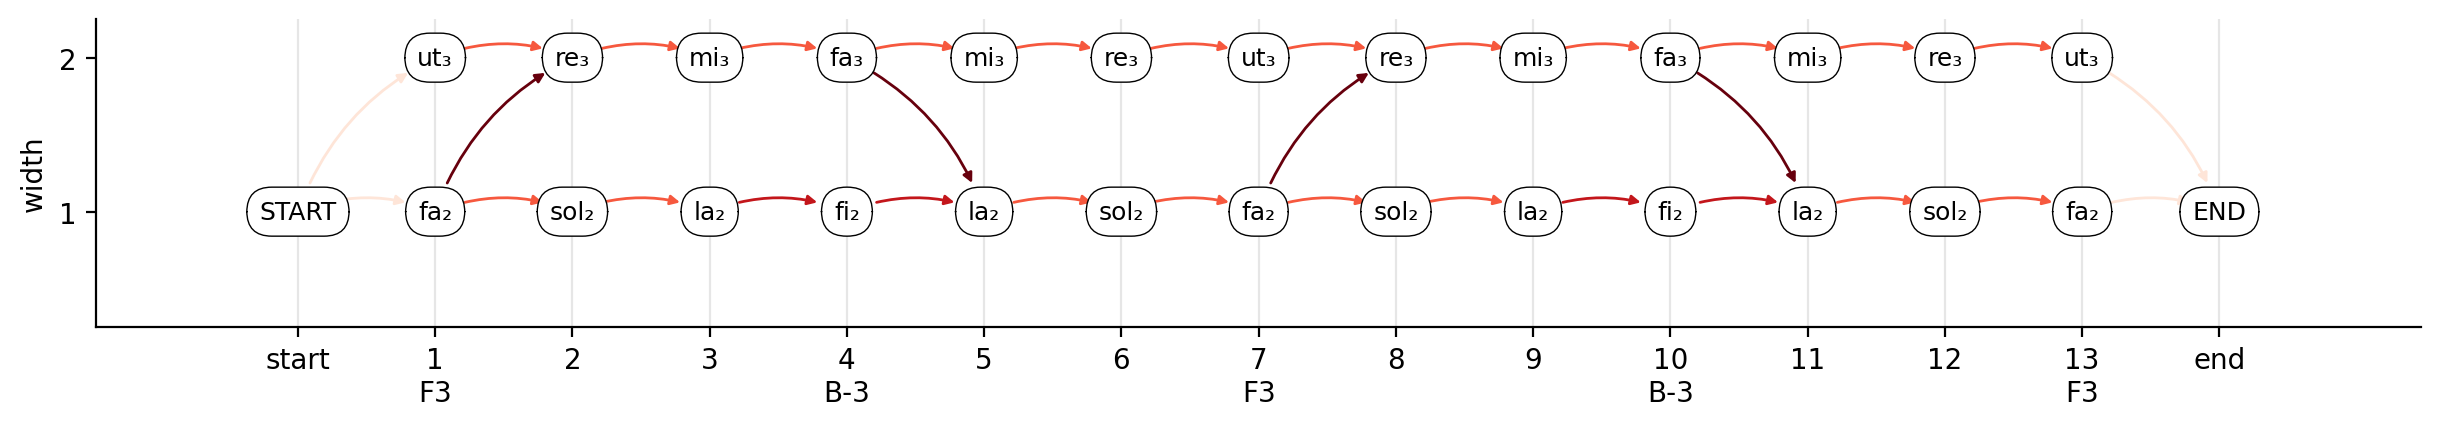

In [4]:
stream = as_stream('F3 B-3 F3 B-3 F3')
sol = solmize(stream, gamut='soft-continental')
sol.draw_parse()

Here is the skeleton resulting in multiple paths of identical cost. The question is basically where you mutate to the next hexichord. The target annotation mutates immediately, avoiding extensive fa-super-la's. So one fix would be to increase the fa-super-la weight.

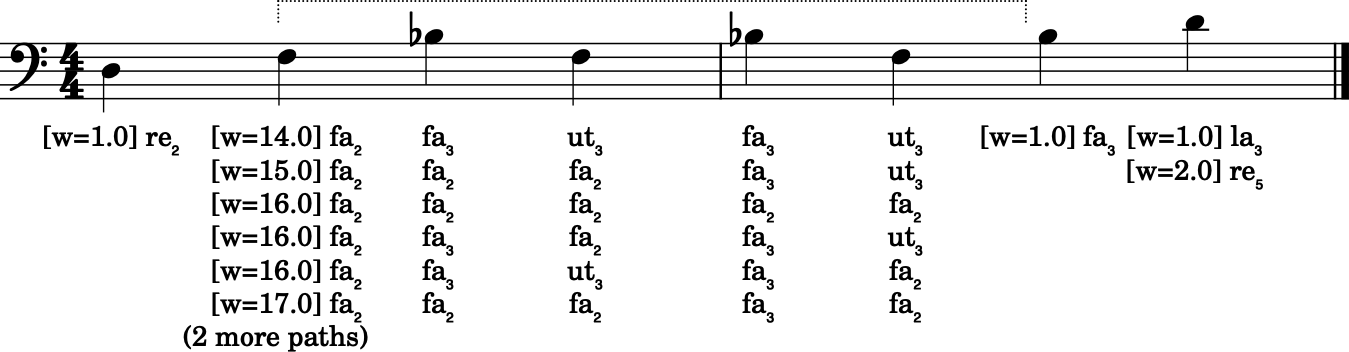

In [5]:
stream = as_stream('D3 F3 B-3 F3 B-3 F3 B-3 D4')
sol = solmize(stream, gamut='soft-continental')
sol.annotate() # No longer works? 
stream.show()

## Issue with ties

Not ideal, but currently solved by basically stripping ties when loading streams

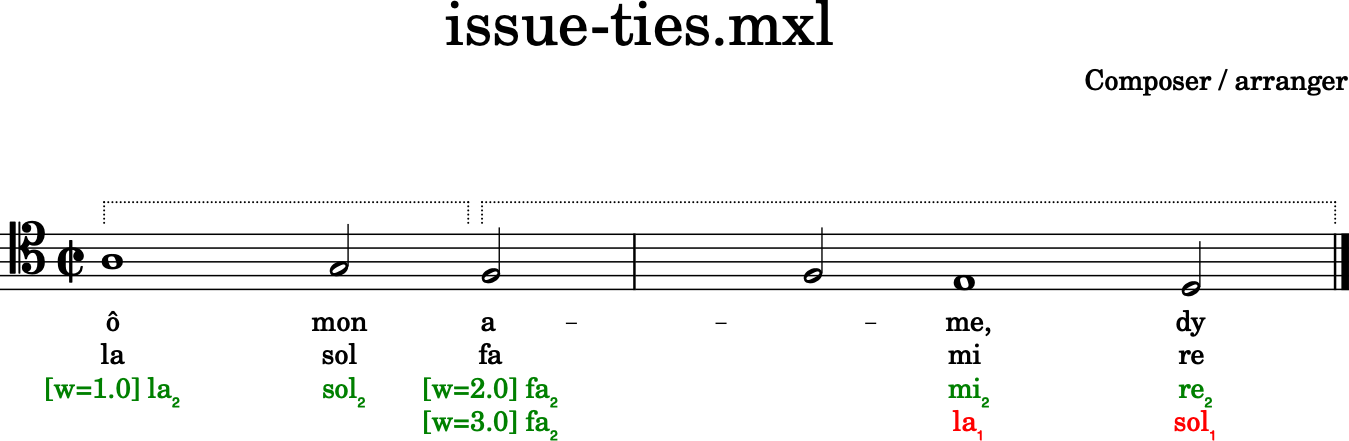

In [6]:
score = music21.converter.parse('../tests/scores/issue-ties.mxl')
solmization = solmize(score, style='continental')
solmization.annotate(target_lyrics=2, lyric_offset=3)
score.show()

## Issue from psalm 4

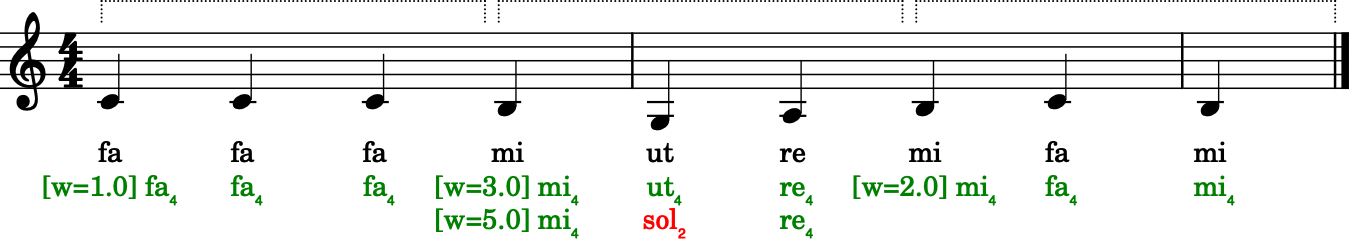

In [7]:
exPsalm04 = 'C4 C4 C4 B3 G3 A3 B3 C4 B3'
pitches = [Pitch(p) for p in exPsalm04.split(' ')]
stream = music21.stream.Stream([Note(p) for p in pitches])
targets = 'fa fa fa mi ut re mi fa mi'.split(' ')
for note, syll in zip(stream, targets): note.lyric = syll
sol = solmize(stream, gamut='hard-continental')
sol.annotate(targets=targets, lyric_offset=2)
stream.show()

## Isaac

In [3]:
CORPUS_DIR = '/Users/bas/surfdrive/Research/Guidonian Hand/Corpus'
SMITH_DIR = f'{CORPUS_DIR}/Smith'
isaac_fn = f'{SMITH_DIR}/musicxml/isaac.musicxml'

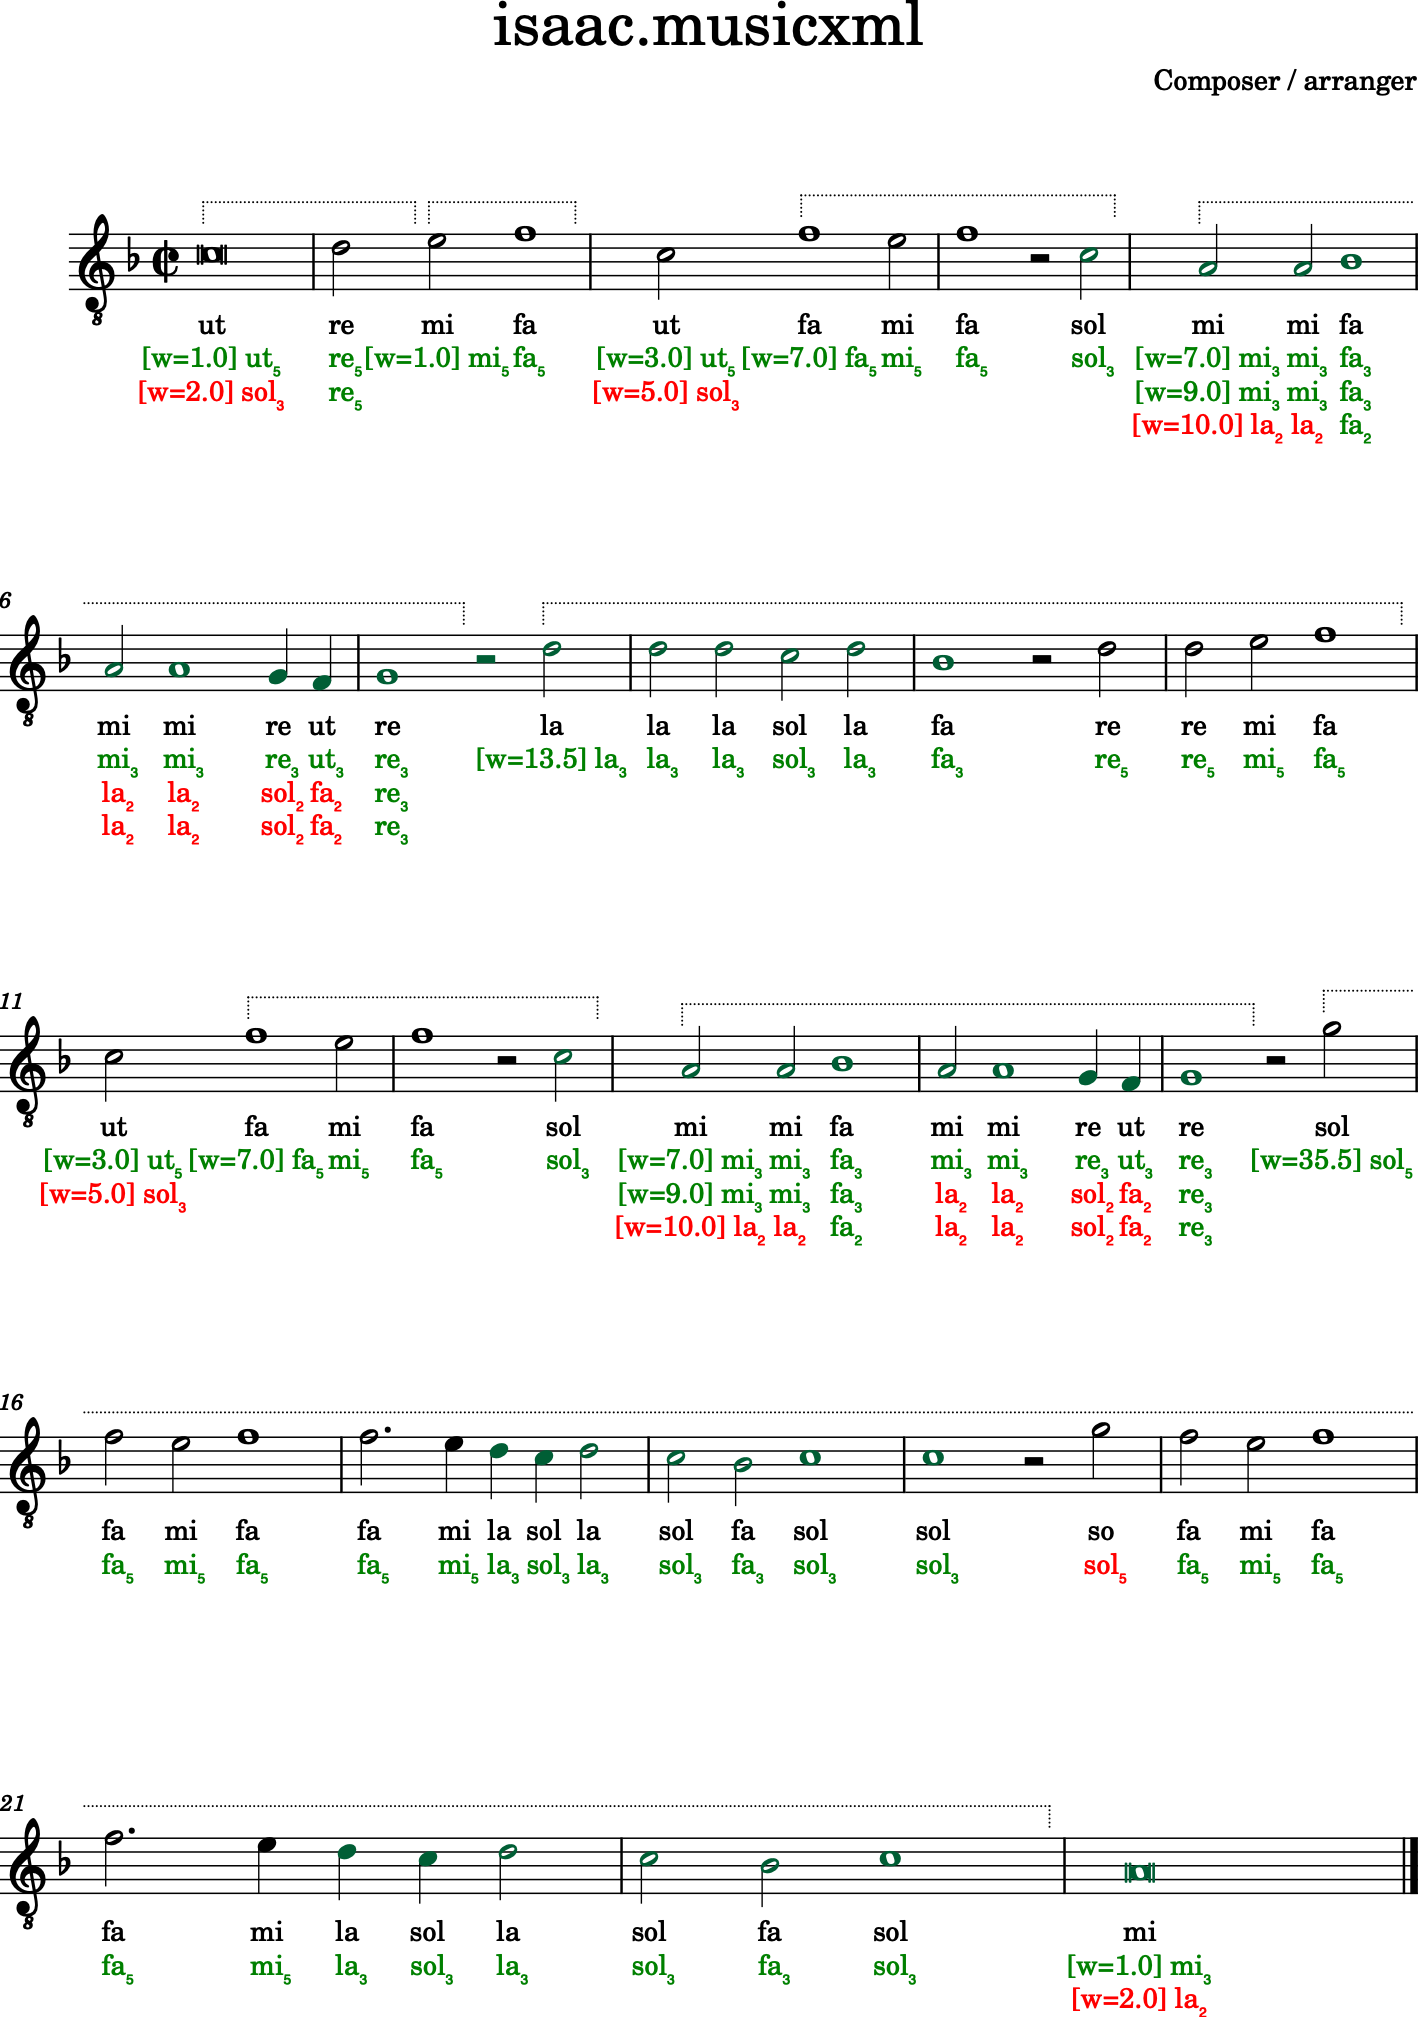

In [12]:
score = music21.converter.parse(isaac_fn)
[soprano, alto, tenor, bass] = score.parts
solmization = solmize(alto, style='continental')
solmization.annotate(target_lyrics=1)
alto.show()

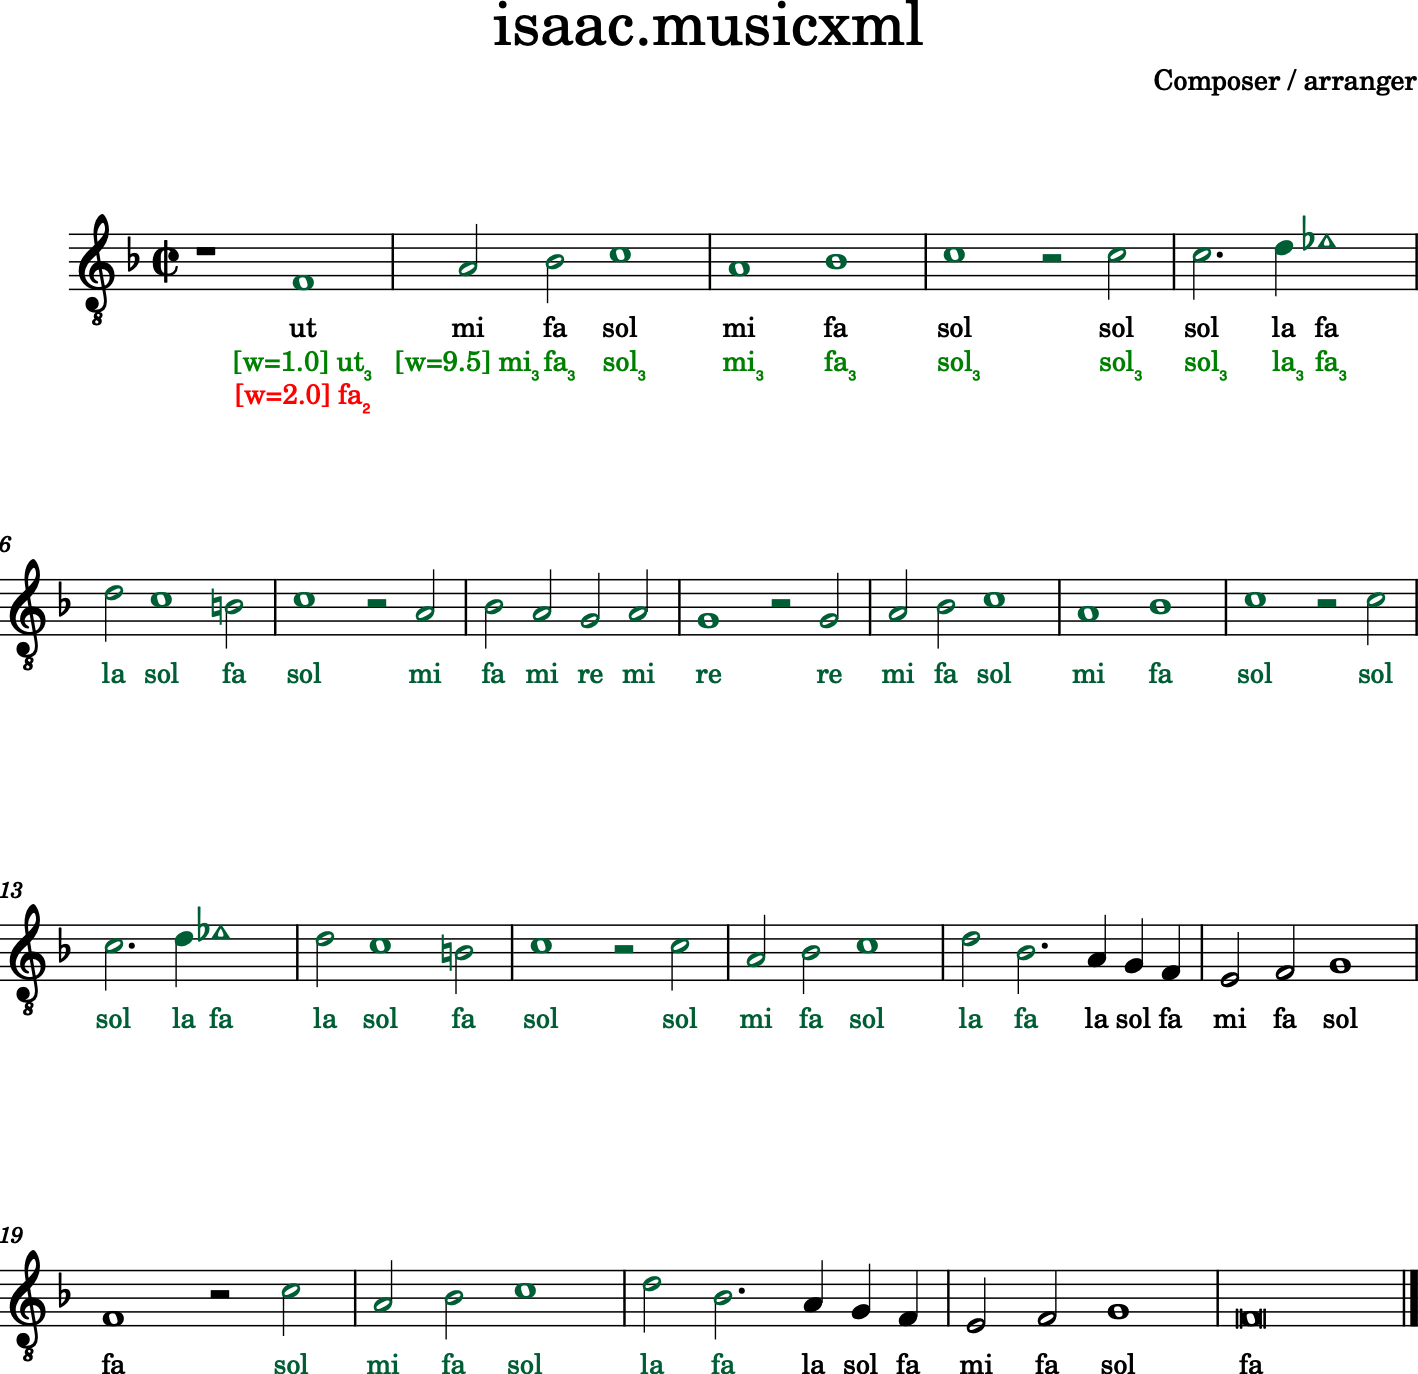

In [20]:
score = music21.converter.parse(isaac_fn)
[soprano, alto, tenor, bass] = score.parts
solmization = solmize(tenor.measures(1, 5), style='continental')
solmization.annotate(target_lyrics=1)
tenor.show()

## Issue: B-flat in natural hexachord

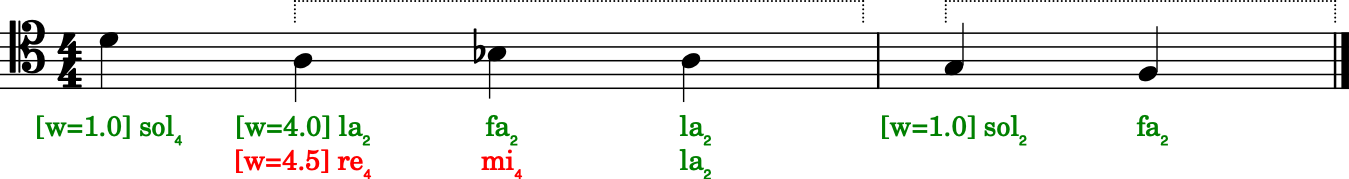

In [7]:
from music21.clef import TenorClef
from delasol get_gamut
example = as_stream('D4 A3 B-3 A3 G3 F3')
targets = 'sol la fa la sol fa'.split(' ')
example.insert(0, TenorClef())
solmization = solmize(example, gamut='hard-continental', fa_super_la_weight=1)
solmization.annotate(targets=targets)
example.show()


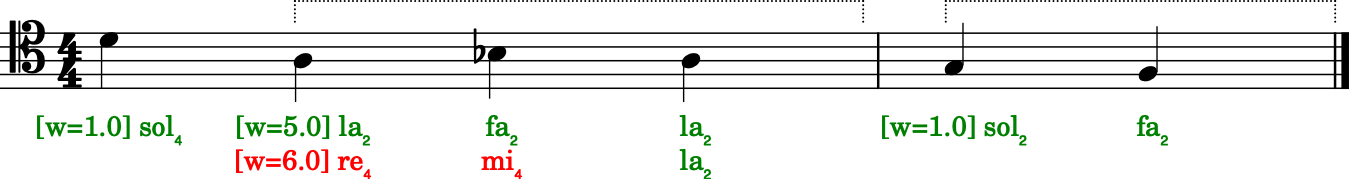

In [9]:
from music21.clef import TenorClef
example = as_stream('D4 A3 B-3 A3 G3 F3')
example.insert(0, TenorClef())
targets = 'sol la fa la sol fa'.split(' ')
solmization = solmize(example, 
    gamut='hard-continental', 
    fa_super_la_weight=1.5, 
    mismatch_penalty=2)
solmization.annotate(targets=targets)
example.show()

## Goudimel

In [4]:
goudimel_fn = f'{SMITH_DIR}/musicxml/goudimel.musicxml'
score = music21.converter.parse(goudimel_fn)
[soprano, alto, tenor, bass] = score.parts

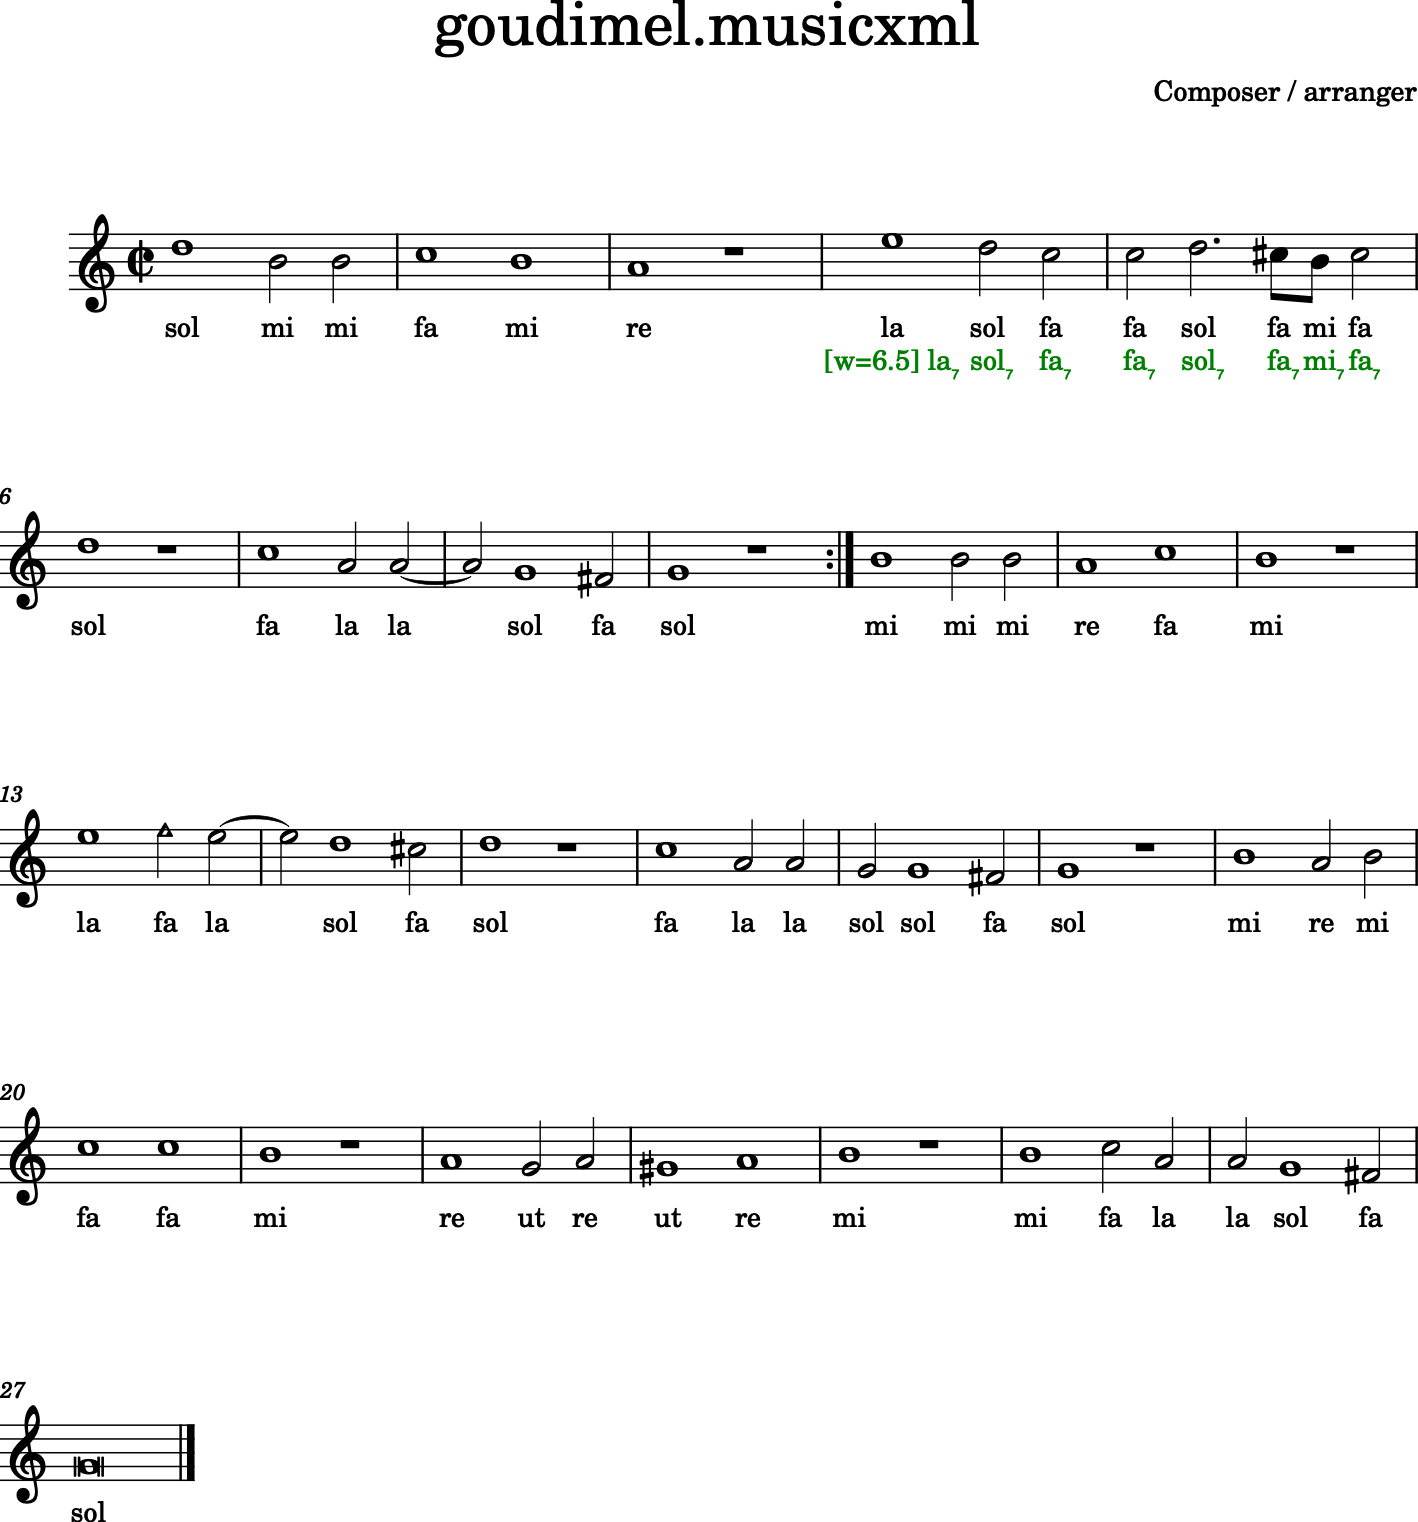

In [5]:
solmization = solmize(soprano.measures(4, 5), style='continental')
solmization.annotate(target_lyrics=1)
soprano.show()

## Notes

### Parse graphs change when extending the sequence

Note that adding pitches may change the parse graph: depending on how the sequence continues, certain paths may be pruned. If a sequence $A$ is a prefix of $B$, the parse graph of $A$ need not be a subgraph of $B$. Here is a simple example:

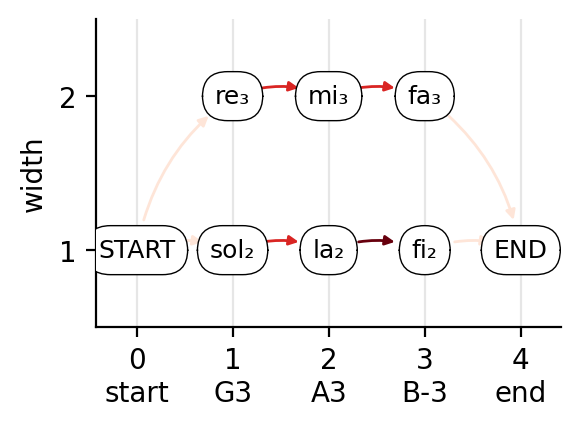

In [ ]:
solmize('G3 B-3'.split(' '), gamut='soft-continental').draw_parse()

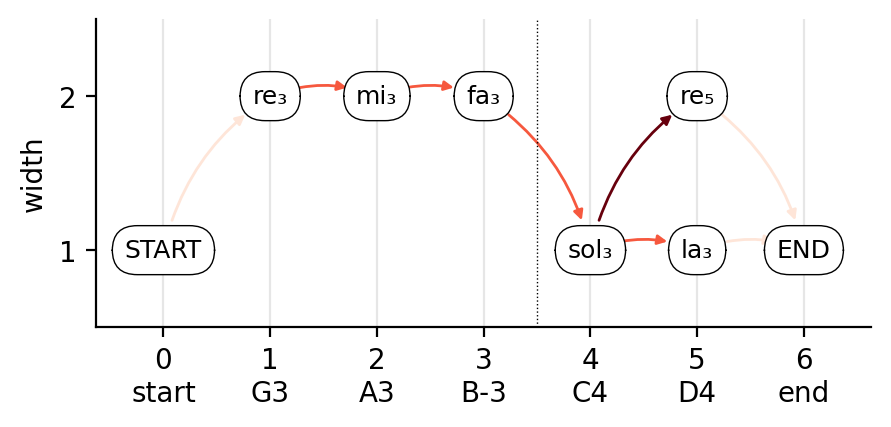

In [ ]:
solmize('G3 B-3 D4'.split(' '), gamut='soft-continental').draw_parse()